# 🌳 Decision Tree Regressor — Intuition & Mathematics

---

## 1️⃣ What is a Decision Tree Regressor?

A **Decision Tree Regressor** is a supervised learning algorithm that predicts **continuous numerical values** by recursively splitting the dataset into smaller regions and making predictions based on **averages of values in each region**.

Instead of predicting a class label, it predicts a **number**.

---

## 2️⃣ How It Differs from Decision Tree Classifier

| Aspect | Classifier | Regressor |
|--------|-----------|-----------|
| Output | Categorical | Continuous |
| Split Criterion | Gini / Entropy | **Variance Reduction / MSE** |
| Leaf Output | Majority class | **Mean value** |
| Evaluation | Accuracy, F1 | **MSE, RMSE, R²** |

---

## 3️⃣ Core Idea (Intuition)

> **“Split the data so that values inside each region are as similar as possible.”**

The model tries to:
- Create regions where target values have **low variance**
- Each leaf predicts the **average value** of that region

---

## 4️⃣ Variance and Why It Matters

Variance measures how spread out values are:

$$
\text{Variance} = \frac{1}{n} \sum (y - \bar{y})^2
$$

- Low variance → values are similar
- High variance → values are scattered

Decision Tree Regressor tries to:
> **Minimize variance at every split**

---

## 5️⃣ How Splits Are Chosen (Variance Reduction)

For every possible split:

$$
\text{Variance Reduction} = \text{Var(parent)} - \sum w_i \cdot \text{Var(child}_i\text{)}
$$

Where:
- $w_i$ = proportion of samples in child node
- Best split = **maximum variance reduction**

---

## 6️⃣ Leaf Node Prediction

At a leaf node:
$$
\hat{y} = \text{Mean of all target values in the leaf}
$$

Example:
Values = [150, 160, 155]  
Prediction = (150 + 160 + 155) / 3 = **155**

---

## 7️⃣ Numerical Feature Splitting

Since all features are numeric:
- Tree tries multiple **threshold values**
- Example:
  - `age <= 45`
  - `bmi <= 0.02`
- Chooses the threshold that **minimizes prediction error**

---

## 8️⃣ Overfitting in Regression Trees

Regression trees:
- Can grow very deep
- Can memorize individual data points

This leads to:
- Very low training error
- High test error

---

## 9️⃣ Controlling Overfitting

### ✂️ Pre-Pruning (Early Stopping)
- Limit tree growth using:
  - `max_depth`
  - `min_samples_split`
  - `min_samples_leaf`

### ✂️ Post-Pruning
- Grow full tree
- Cut branches using `ccp_alpha`

---

## 🔟 Strengths of Decision Tree Regressor

✅ Handles non-linear relationships  
✅ No feature scaling needed  
✅ Easy to interpret  
✅ Works with mixed feature types  

---

## 🔴 Limitations

❌ Overfits easily  
❌ Unstable (small data change = different tree)  
❌ Poor extrapolation  
❌ Not smooth predictions  

---

## 🎯 Final Takeaway

Decision Tree Regressor:
- Predicts numbers, not classes
- Splits data to **minimize variance**
- Predicts using **averages in leaf nodes**
- Powerful but prone to overfitting
- Forms the foundation for:
  - Random Forest Regressor
  - Gradient Boosting
  - XGBoost

In [1]:
# -----------------------------------------------
# Load Diabetes Dataset
# -----------------------------------------------

# Import the built-in diabetes dataset from scikit-learn
# This dataset is commonly used for regression tasks
from sklearn.datasets import load_diabetes

# Load the dataset into a dictionary-like object
# It contains:
# - data → feature values
# - target → continuous output (disease progression)
# - feature_names → names of input features
# - DESCR → full dataset description
diabetes_dataset = load_diabetes()

# Print dataset description for understanding context
print(diabetes_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee


---
#### 🧠 What This Dataset Represents (Quick Intuition)
- Each row = one patient
- Features = medical measurements (BMI, blood pressure, etc.)
- Target = disease progression score (continuous value)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [4]:
# -----------------------------------------------
# Convert Dataset to pandas DataFrame
# -----------------------------------------------

import pandas as pd

# Create a DataFrame for input features
# diabetes_dataset['data'] → numerical feature matrix
# diabetes_dataset['feature_names'] → column names for each feature
X = pd.DataFrame(
    diabetes_dataset['data'],
    columns=diabetes_dataset['feature_names']
)

# Create a Series for the target variable
# This represents the disease progression score (continuous values)
y = pd.Series(diabetes_dataset['target'], name="disease_progression")

# Display the first few rows of the feature DataFrame
# Helps verify data loading and understand feature structure
display(X.head())

# Display the first few target values
print("\n🔹 Target Preview:")
print(y.head())


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641



🔹 Target Preview:
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: disease_progression, dtype: float64


In [ ]:
# -----------------------------------------------
# Split Dataset into Training and Testing Sets
# -----------------------------------------------

from sklearn.model_selection import train_test_split

# X → input features (medical measurements)
# y → target variable (disease progression score)
# test_size=0.3 → 10% of data used for testing, 80% for training
# random_state=10 → ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=10
)

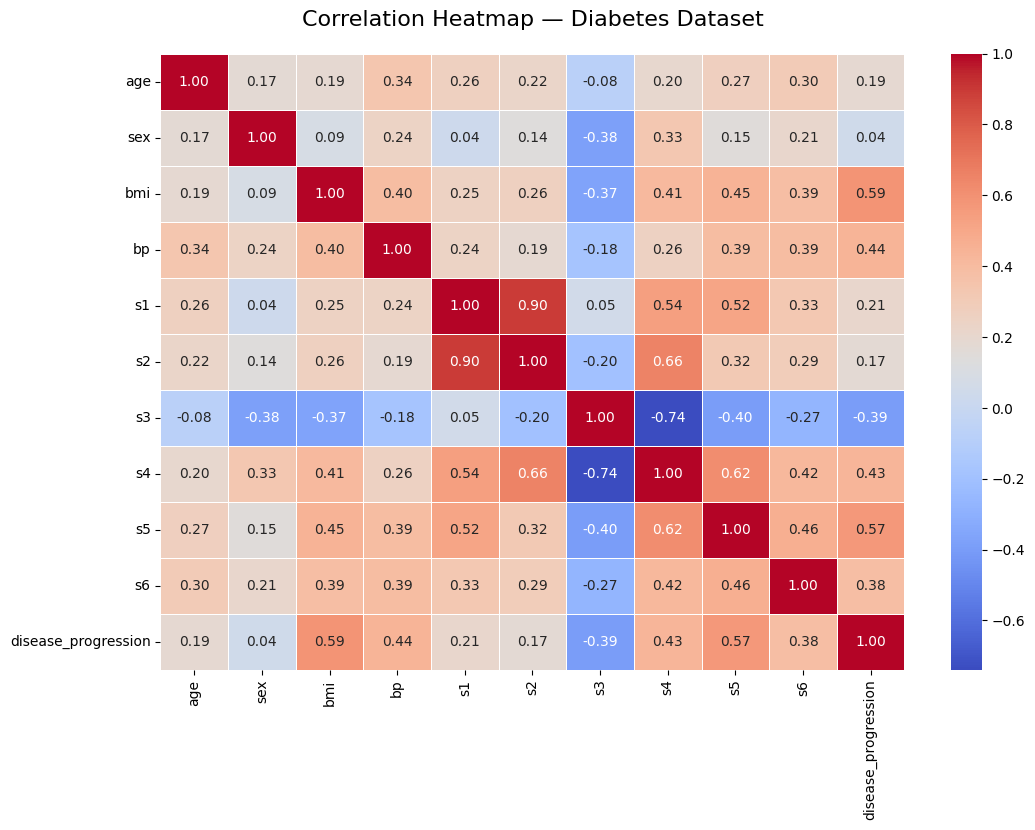

In [6]:
# -----------------------------------------------
# Correlation Analysis & Heatmap
# -----------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target into a single DataFrame for correlation analysis
correlation_df = X.copy()
correlation_df["disease_progression"] = y

# Compute correlation matrix
corr_matrix = correlation_df.corr()

# Create a large, readable heatmap
plt.figure(figsize=(12, 8))

# Plot the correlation heatmap
sns.heatmap(
    corr_matrix,
    annot=True,         # Show correlation values
    fmt=".2f",         # Format values to 2 decimal places
    cmap="coolwarm",  # Color scheme: red = positive, blue = negative
    linewidths=0.5
)

# Add title
plt.title("Correlation Heatmap — Diabetes Dataset", fontsize=16, pad=20)

# Display the plot
plt.show()


### ✅ Train Baseline Decision Tree Regressor

In [7]:
# -----------------------------------------------
# Train Baseline Decision Tree Regressor
# -----------------------------------------------

from sklearn.tree import DecisionTreeRegressor

# Create the Decision Tree Regressor
# By default:
# - criterion = "squared_error" → minimizes Mean Squared Error (variance reduction)
# - max_depth = None → tree grows until all leaves are pure or stopping rules are met
# - random_state = None → results may vary between runs
baseline_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using training data
# X_train → feature values (medical measurements)
# y_train → target values (disease progression score)
# The tree learns splitting rules that minimize prediction error at each node
baseline_regressor.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


🔹 Baseline Decision Tree Regressor Performance
MSE : 7533.6766917293235
RMSE: 86.79675507603567
MAE : 67.10526315789474
R²  : -0.19059233303791712


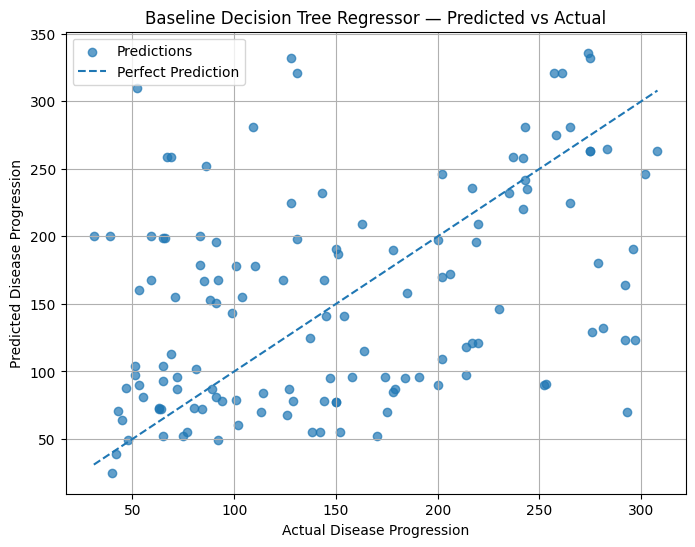

In [8]:
# -----------------------------------------------
# Evaluate Baseline Decision Tree Regressor
# -----------------------------------------------

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------------------
# 1️⃣ Make Predictions on Test Data
# -----------------------------------------------

# Predict disease progression for unseen test data
y_pred_baseline = baseline_regressor.predict(X_test)

# -----------------------------------------------
# 2️⃣ Compute Regression Metrics
# -----------------------------------------------

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_baseline)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_baseline)

# R-squared Score (R²)
r2 = r2_score(y_test, y_pred_baseline)

# Display results
print("🔹 Baseline Decision Tree Regressor Performance")
print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)

# -----------------------------------------------
# 3️⃣ Predicted vs Actual Visualization
# -----------------------------------------------

plt.figure(figsize=(8, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_baseline, alpha=0.7, label="Predictions")

# Perfect prediction reference line (y = x)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--",
    label="Perfect Prediction"
)

plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Baseline Decision Tree Regressor — Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# -----------------------------------------------
# Hyperparameter Grid for Pre-Pruning (Regressor)
# -----------------------------------------------

params = {
    # criterion → metric used to measure split quality
    # "squared_error"  → minimizes MSE (default, most common)
    # "friedman_mse"  → MSE with Friedman's improvement score (better for boosting-style splits)
    # "absolute_error" → minimizes MAE (robust to outliers)
    "criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"],

    # splitter → strategy to choose the split at each node
    # "best"   → chooses the best possible split
    # "random" → chooses a random split (adds regularization)
    "splitter": ["best", "random"],

    # max_depth → maximum depth of the tree
    # Controls model complexity
    "max_depth": [1, 2, 3, 4, 5, 10, 15, 20, 25],

    # max_features → number of features considered at each split
    # None  → consider all features
    # "sqrt" → sqrt(total_features)
    # "log2" → log2(total_features)
    "max_features": [None, 'auto', "sqrt", "log2"],

    # min_samples_leaf → minimum samples required in a leaf node
    # Strong regularizer for regression trees
    "min_samples_leaf": [1, 2, 5, 10, 20],

    # min_samples_split → minimum samples required to split an internal node
    # Prevents splitting very small groups
    "min_samples_split": [2, 5, 10, 20]
}

### ✅ Step 1 — Setup GridSearchCV

In [12]:
# -----------------------------------------------
# GridSearchCV for Decision Tree Regressor
# -----------------------------------------------

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Create base regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Setup GridSearch
# cv=5 → 5-fold cross-validation
# scoring="neg_mean_squared_error" → regression metric (lower MSE is better)
# n_jobs=-1 → use all CPU cores
grid_reg = GridSearchCV(
    estimator=tree_regressor,
    param_grid=params,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)


### ✅ Step 2 — Run GridSearch

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
# -----------------------------------------------
# Fit GridSearch on Training Data
# -----------------------------------------------

# This will:
# - Train many decision trees with different hyperparameter combinations
# - Evaluate each using cross-validation
# - Select the model with the lowest MSE
grid_reg.fit(X_train, y_train)


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'friedman_mse', ...], 'max_depth': [1, 2, ...], 'max_features': [None, 'auto', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


### ✅ Step 3 — View Best Hyperparameters

In [16]:
# -----------------------------------------------
# Best Hyperparameters Found
# -----------------------------------------------

best_params_reg = grid_reg.best_params_

print("🔹 Best Pre-Pruning Hyperparameters (Regressor):")
for param, value in best_params_reg.items():
    print(f"{param} → {value}")


🔹 Best Pre-Pruning Hyperparameters (Regressor):
criterion → squared_error
max_depth → 3
max_features → None
min_samples_leaf → 10
min_samples_split → 2
splitter → best


### ✅ Step 4 — Train Final Tuned Decision Tree Regressor

In [17]:
# -----------------------------------------------
# Train Final Pre-Pruned Decision Tree Regressor
# -----------------------------------------------

from sklearn.tree import DecisionTreeRegressor

# Create a new regressor using the best hyperparameters
final_regressor = DecisionTreeRegressor(
    **best_params_reg,
    random_state=42
)

# Train the final model on training data
final_regressor.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### ✅ Step 5 — Evaluate Tuned Model

🔹 Tuned Decision Tree Regressor Performance
MSE : 3395.6828701757613
RMSE: 58.27248810695971
MAE : 47.19281020915027
R²  : 0.46335977025695463


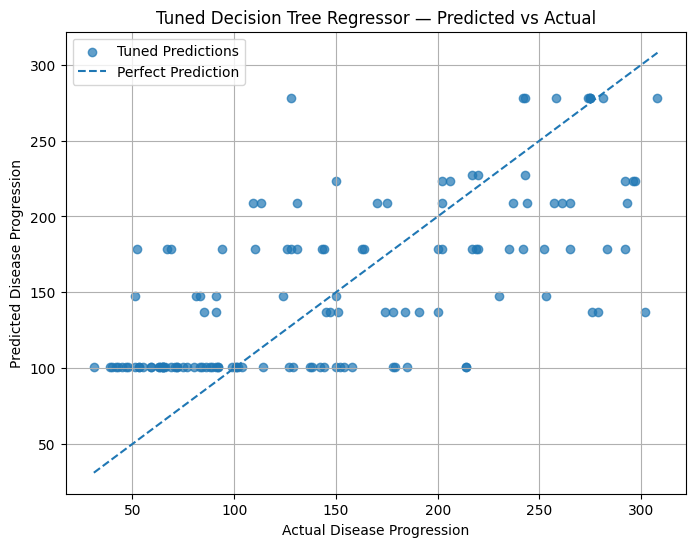

In [18]:
# -----------------------------------------------
# Evaluate Final Tuned Decision Tree Regressor
# -----------------------------------------------

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on test data
y_pred_tuned = final_regressor.predict(X_test)

# Compute metrics
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("🔹 Tuned Decision Tree Regressor Performance")
print("MSE :", mse_tuned)
print("RMSE:", rmse_tuned)
print("MAE :", mae_tuned)
print("R²  :", r2_tuned)

# -----------------------------------------------
# Predicted vs Actual Visualization (Tuned Model)
# -----------------------------------------------

plt.figure(figsize=(8, 6))

plt.scatter(y_test, y_pred_tuned, alpha=0.7, label="Tuned Predictions")

plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--",
    label="Perfect Prediction"
)

plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Tuned Decision Tree Regressor — Predicted vs Actual")
plt.legend()
plt.grid(True)
plt.show()


### ✅ Step 6 — Baseline vs Tuned Comparison Table

In [19]:
# -----------------------------------------------
# Baseline vs Tuned Comparison
# -----------------------------------------------

import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

comparison_df = pd.DataFrame({
    "Model": ["Baseline Tree", "Tuned Tree"],
    "MSE": [
        mean_squared_error(y_test, y_pred_baseline),
        mse_tuned
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_baseline)),
        rmse_tuned
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_baseline),
        mae_tuned
    ],
    "R² Score": [
        r2_score(y_test, y_pred_baseline),
        r2_tuned
    ]
})

print("🔹 Baseline vs Tuned Decision Tree Regressor:")
display(comparison_df)


🔹 Baseline vs Tuned Decision Tree Regressor:


,Model,MSE,RMSE,MAE,R² Score
0,Baseline Tree,7533.676692,86.796755,67.105263,-0.190592
1,Tuned Tree,3395.682870,58.272488,47.192810,0.463360
